In [2]:
#Manejo de matrices y tablas
import numpy as np
import pandas as pd

#Estadistica y funciones matemáticas
import scipy.stats as st

#Graficas
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, HBox, VBox, Layout
from graphviz import Source
from graphviz import Digraph
import altair as alt


# Conociendo a Bayes

Santiago Alonso-Díaz, PhD

Universidad Javeriana

<center><img src="img/2_CB/Thomas_Bayes.gif" width = "300" height = '300'></center>

El teorema:

$$ p(\theta|y) = \frac{p(y|\theta)p(\theta)}{p(y)}$$

De ahora en adelante, piensen a `p` como una distribución (continua o discreta; hay muchas no solo normales):

<center><img src="img/2_CB/normal_poisson.svg" width = "800" height = '700'></center>


$\theta$: hipótesis; $y$: datos

El teorema:

$$ p(\theta|y) = \frac{p(y|\theta)p(\theta)}{p(y)}$$

Expandamos el denominador, que es la probabilidad de los datos bajo TODAS las hipótesis:

$$ p(\theta|y) = \frac{p(y|\theta)p(\theta)}{\int{p(y|\theta)p(\theta)d\theta}}$$

Al denominador se le llama `marginal`

El marginal es una constante que nos asegura que el posterior esté entre 0 y 1. Usualmente es difícil de calcular y se usa la versión proporcional del teorema:
$$ p(\theta|y) \propto p(y|\theta)p(\theta)$$

¿Qué es probabilidad? Definición formal

* Medida positiva (+) de eventos (E) en un espacio (H)
* La probabilidad de todo el espacio (H) es 1
* La probabilidad de eventos mutuamente excluyentes se puede sumar

¿Qué es probabilidad? Interpretaciones 
<center> <p style = 'font-size = 20px'> Frecuentista vs. Creencias</p> </center>


¿Cuál es la probabilidad de que caiga cara? 
<center><img src="img/2_CB/Coin_cara.png" width = "150" height = '150'></center>


¿Cuál es la probabilidad de que caiga cara? Lanzamos la moneda 7 veces
<center><img src="img/2_CB/Coin_cara_sello.png" width = "340" height = '340'></center>

¿Cuál es la probabilidad de ganarse un premio Nobel?
<center><img src="img/2_CB/Nobel_Prize.png" width = "240" height = '240'></center>

¿Cuál es la probabilidad de ganarse un premio Nobel? ¿Podemos usar frecuencias? Población mundial aprox. 7800 millones.

|Nobel|Ganadores|
|:-----:|:---------:|
|Física|213|
|Química|184|
|Medicina|219|
|Literatura|116|
|Paz|134|
|Economía|84|
|**Total**|950|

Fuente: nobelprize.org (2020)


Probabilidad frecuentista: frecuencia de eventos; hay un estimativo puntual

|Problema|Datos|$\theta$|
|:-------:|:-------:|:-------:|
|<img src="img/2_CB/Coin_cara.png" width = "175" height = '175'>|1 cara, 6 sellos|$\frac{1}{7}$|

Probabilidad bayesiana: creencias; hay una distribución sobre el estimativo

|Problema|Datos|$\theta$|
|:-------:|:-------:|:-------:|
|<img src="img/2_CB/Coin_cara.png" width = "175" height = '175'>|1 cara, 6 sellos|<img src="img/2_CB/beta.svg" width = "200" height = '200'>|


El poder de Bayes: 

Nos dice cómo creencias a priori sobre una hipótesis ($p(\theta))$ se actualizan con datos para obtener una nueva creencia a posteriori ($p(\theta|data)$).

$$ p(\theta|data) = \frac{p(data|\theta)p(\theta)}{p(data)}$$

El prior del futuro es el posterior de hoy.

Prior: cae cara 50% de las veces. <br>
Posterior: una vez cara de diez, la probabilidad debe ser menor.

Prior: 30% en Colombia tiene COVID-19. <br>
Posterior: test positivo, 70% sí tiene el virus (hay falsos positivos)

Prior: el código es enorme, 80% debe haber un bug. <br>
Posterior: una semana sin errores, 33.781% hay un bug 

Prior: todo número par es la suma de dos primos (conjetura de Goldbach) <br>
Posterior: no se ha encontrado contraejemplo, puede ser cierto (pero no 100% seguro).


Visualicemos el ejemplo de una moneda.

Objetivo: inferir la probabilidad de que caiga cara dado unos datos

In [4]:
# Plot interactivo. Actualización de creencias con datos (ejemplo moneda)
# Ver plot interactivo en el notebook

theta_real = 0.375 #probabilidad de cara (la que queremos inferir)
def posterior_beta(lanzamientos, a, b):
    #Likelihood: caras se distribuye Bernoulli
    #Prior: Beta con parametros a, b 
    #NOTA: más adelante en el curso derivaremos el posterior
    #para saber de donde viene, y por qué termina siendo beta, 
    #como el prior (no siempre es el caso que el posterior sea 
    #de la familia del prior)
    
    #Experimento (data)
    np.random.seed(seed=1144)
    caras = st.bernoulli.rvs(theta_real, size=lanzamientos).sum()
    
    #Prior (creencia)
    prior_par = np.array([a,b]) 
    
    #Posterior (creencia actualizada)
    nsims = 10000
    a = caras + prior_par[0]
    b = lanzamientos - caras + prior_par[1]
    posterior_samples = np.sort(st.beta.rvs(a = a, b = b, size = nsims)) 
    posterior_pdf = st.beta.pdf(x = posterior_samples, a = a, b = b)
    
    #Gráfica
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    idx1 = np.where(posterior_samples>=np.percentile(posterior_samples,q=2.5))[0][0]
    idx2 = np.where(posterior_samples>=np.percentile(posterior_samples,q=97.5))[0][0]
    text = "[" + str(np.round(posterior_samples[idx1],3)) +\
    "," + str(np.round(a/(a+b),3)) +\
    "," + str(np.round(posterior_samples[idx2],3)) + "]"
    ax.plot(posterior_samples, posterior_pdf,'r-', lw=5, alpha=0.8, 
            label = '[2.5%, mean, 97.5%]  = ' + text)
    ax.set_title('Posterior (creencia de cara) \n Prob. real: ' + str(theta_real))
    ax.set_xlabel('Probabilidad cara')
    ax.set_ylabel('Densidad')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1.2*np.max(posterior_pdf)])
    ax.legend(loc = 'upper right')   

In [5]:
w_experimento = widgets.BoundedIntText(value = 3, description = 'Lanzadas: ',
                                      min = 1, max = 1000000)
#Beta(1,1) es uniforme. Busque en internet la distribucion Beta; conozcola.
w_prior_par_a = widgets.BoundedIntText(value = 1, description = 'Prior par a: ',
                        min = 1, max = 1000000)
w_prior_par_b = widgets.BoundedIntText(value = 1, description = 'Prior par b: ',
                        min = 1, max = 1000000)
out = widgets.interactive_output(posterior_beta, 
                                 {'lanzamientos': w_experimento, 
                                  'a': w_prior_par_a, 'b': w_prior_par_b})
left_widgets = VBox([w_experimento])
right_widgets = VBox([w_prior_par_a, w_prior_par_b])
top = HBox([left_widgets, right_widgets])
VBox([top, out])


Otro ejemplo basado en Kahneman, 2011, Thinking, Fast, and Slow.

Objetivo: adivinar la profesión.

Carlos es tímido, amable, pero con poco interés por socializar. Le gusta el orden y es preciso en su trabajo.

¿Ingeniero electrónico o administrador de empresas?


La mayoría dice ingeniero electrónico. ¿Por qué? ¿Reporte del likelihood? ¿Obviar el prior?

In [6]:
#Otro ejemplo: Ingeniero electrónico o administrador.
#Basado en: Davidson-Pilon (2015).
def posterior_beta_carlos(a_prior, b_prior, data_experimento):
    #Bayes
    prior_par = np.array([a_prior,b_prior])
    prior_mean = [a_prior/(a_prior+b_prior), 1 - a_prior/(a_prior+b_prior)]
    nsims = 10000
    juicio_ing = data_experimento[0]
    juicio_todos = data_experimento.sum() 
    a =  juicio_ing + prior_par[0]
    b = juicio_todos - juicio_ing + prior_par[1]
    posterior_mean = [a/(a+b), 1 - a/(a+b)] #Con prior uniforme
    
    a =  juicio_ing + prior_real[0]
    b = juicio_todos - juicio_ing + prior_real[1]
    posterior_real_mean = [a/(a+b), 1 - a/(a+b)]#Con prior real
    
    #Gráfica
    #Con prior uniforme
    fig, ax = plt.subplots(1,2, figsize=(12, 3))
    colors = ["#348ABD", "#A60628"]
    fig.suptitle('Prior y posteriors de las profesiones de Carlos')
    ax[0].bar([0, .7], prior_real, alpha=0.70, width=0.25, color=colors[0], label="Prior real",
            lw="3", edgecolor="#348ABD")
    ax[0].bar([0+0.25, .7+0.25], posterior_mean, alpha=0.7,
            width=0.25, color=colors[1], label="Posterior con prior uniforme",
            lw="3", edgecolor="#A60628")
    ax[0].set_xticks([0.20, 0.95])
    ax[0].set_xticklabels(["Ingeniero", "Admin."])
    #ax[0].set_title("Prior real y posterior de las profesiones de Carlos")
    ax[0].set_ylabel("Probabilidad")
    ax[0].set_ylim([0,1.1])
    ax[0].legend(loc="upper right");
    
    #Con prior real
    ax[1].bar([0, .7], prior_real, alpha=0.70, width=0.25, color=colors[0], label="Prior real",
            lw="3", edgecolor="#348ABD")
    ax[1].bar([0+0.25, .7+0.25], posterior_real_mean, alpha=0.7,
            width=0.25, color=colors[1], label="Posterior con prior real",
            lw="3", edgecolor="#A60628")
    ax[1].set_xticks([0.20, 0.95])
    ax[1].set_xticklabels(["Ingeniero", "Admin."])
    #ax[1].set_title("Prior real y posterior de las profesiones de Carlos")
    ax[1].set_ylabel("Probabilidad")
    ax[1].set_ylim([0,1.1])
    ax[1].legend(loc="upper right");


Data experimento: 
Electrónico: 133798
Administrador: 44600


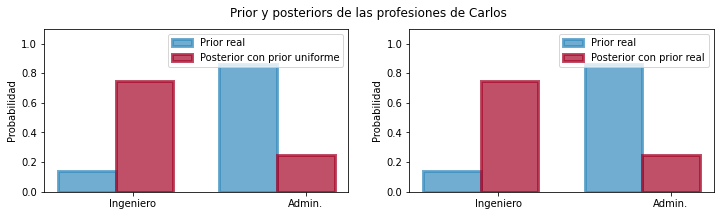

In [7]:
#Datos reales: Colombia, asumamos 2 carreras, datos min. educacion 2001-2018.
grad = np.array([24763, 153635]) #graduados [electrónica, administración]
prior_real = [grad[0]/grad.sum(), grad[1]/grad.sum()] 

#Experimento. Asumamos que le preguntamos a todos los graduados y 
# encontramos estos juicios de Carlos: [ingeniero electrónico, administrador]
data_experimento = np.array([round(grad.sum()*3/4), round(grad.sum()*1/4)]) 
print('Data experimento: \nElectrónico: ' + str(data_experimento[0]) + "\nAdministrador: "  + str(data_experimento[1]))

#El prior real (azul) se ve diferente a las creencias (posterior, rojo). 
#No importa cual prior se use, la creencia esta sesgada. La gente no usa 
#la probabilidad real apriori de ser ingeniero electrónico.
#Usan el likelihood: La probabilidad de la descripción de Carlos, dada 
#la hipótesis de ser ingeniero, es alta. 
posterior_beta_carlos(1, 1, data_experimento) 

¿Qué hipótesis $\theta$ pueden interesarnos en ciencia cognitiva e inteligencia artificial? 

* Aversión al riesgo
* Impulsividad (e.g. tasa de descuento intertemporal)
* Utilidad subjetiva
* Confianza institucional
* Egoismo
* Altruismo
* Empatía 
* Psicopatía
* Sensibilidad perceptual
* Habilidad matemática
* Capacidad en bits de un aprendiz
* Interpretación pragmática de una oración
* Identidad de un objeto en el campo visual
* Creatividad
* Nivel de incertidumbre
* Otras



# Derivación matemática de una posterior beta.
### Likelihood: Bernoulli
### Prior: Beta
### Posterior: Beta (a demostrar)


Datos: binarios independientes (e.g. cara-sello; cesta-no cesta; pasar-perder; feliz-infeliz)

Objetivo: estimar probabilidad latente de éxito

Solución: modelo Beta (Prior) - Bernoulli (LH)

<center><img src="img/2_CB/beta_bernoulli.svg" width = "600" height = '600'></center>

¿A dónde vamos?

Vamos a mostrar que el posterior, al igual que el prior, también es beta. Cuando ocurre esto, decimos que tenemos un `conjugate prior` del likelihood. 

Es decir, el conjugate prior de una Bernoulli es una Beta (ver otros en: https://en.wikipedia.org/wiki/Conjugate_prior).

Esto es útil si queremos obtener una expresión matemática. A continuación vamos a demostrar la conjugación para nuestro ejemplo Bernoulli-Beta.  

Bernoulli (pmf); Dominio: n = 0 o 1; Parámetros: p = [0,1] 
$$P(n) = p^n(1-p)^{1-n}$$

Beta (pdf); Dominio: x = [0,1]; Parámetros: $\alpha$ y $\beta$ > 0; Otros: B = Función Beta

$$P(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$$


In [ ]:
def beta_bernoulli(p, a, b):
    fig, ax = plt.subplots(1,2,figsize = (10.5,4))
    x = np.linspace(st.beta.ppf(0.001, a, b), st.beta.ppf(0.999, a, b), 100)
    ax[0].plot(x, st.beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')
    ax[0].set_xlim([0,1]);
    ax[0].set_title('Prior')
    ax[0].legend()

    x = np.linspace(st.bernoulli.ppf(0.001, p), st.bernoulli.ppf(0.999, p),2)
    ax[1].plot(x, st.bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
    ax[1].vlines(x, 0, st.bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
    ax[1].set_xlim([-0.5,1.5]);
    ax[1].set_ylim([0,1.05]);
    ax[1].set_title('Likelihood')
    ax[1].legend();
    ax[1].set_xticks([0, 1])
    ax[1].set_xticklabels(["0", "1."]);
    

#Bernoulli
w_par_p = widgets.FloatSlider(value = 0.5, description = 'p: ', step = 0.01, min = 0, max = 1)

#Beta(1,1) es uniforme. Busque en internet la distribucion Beta; conozcala.
w_par_a = widgets.BoundedIntText(value = 1, description = 'a (num): ',
                                 min = 1, max = 1000000)
w_par_b = widgets.BoundedIntText(value = 1, description = 'b (den-num): ',
                                 min = 1, max = 1000000)
out = widgets.interactive_output(beta_bernoulli, 
                                 {'p': w_par_p, 
                                  'a': w_par_a, 'b': w_par_b})
right_widgets = VBox([w_par_p])
left_widgets = VBox([w_par_a, w_par_b])
top = HBox([left_widgets, right_widgets])
VBox([top, out])

El problema bayesiano es (sin la constante de propocionalidad): 
<center><img src="img/2_CB/bayes_framework.gv.svg" width = "550" height = '350'></center>

El problema bayesiano es (sin la constante de propocionalidad):

$$posterior \propto prior \times likelihood$$


Prior (modelo de creencias) y likelihood (modelo para los datos) ya los escogimos:

$$posterior \propto beta \times Bernoulli$$


Ahora pongamos las formulas

$$P(\theta|exitos,intentos,\alpha,\beta,p) \propto \frac{\theta^{\alpha-1}(1-\theta)^{\beta-1}}{B(\alpha,\beta)} \times p^{exitos}(1-p)^{intentos-exitos}$$

Algebra:<br>
pars = $\alpha,\beta,p$ <br>
N = intentos<br>
z = exitos

El posterior es proporcional a la multiplicación de una beta y una Bernoulli
\begin{align*}
  p(\theta|z,N,pars) &\propto \theta^z(1-\theta)^{N-z}\frac{\theta^{\alpha-1}(1-\theta)^{\beta-1}}{B(\alpha,\beta)} 
\end{align*}

Sumamos exponentes
\begin{align*}
  p(\theta|z,N,pars) &\propto ... \\
  &\propto \frac{\theta^{z+\alpha-1}(1-\theta)^{N-z+\beta-1}}{B(\alpha,\beta)}
\end{align*}

\begin{equation}
  p(\theta|z,N,pars) \propto \frac{\theta^{z+\alpha-1}(1-\theta)^{N-z+\beta-1}}{B(\alpha,\beta)}
\end{equation}

Seguimos con la versión proporcional. Pero note que el numerador es el de una distribución beta con parámetros: 

$$\alpha_{posterior} = z + \alpha$$
$$\beta_{posterior} = N - z + \beta$$

¡Y ya conocemos como se ve estandarizada! Solo toca cambiar el denominador y poner un igual: 
\begin{equation}
  p(\theta|z,N,pars) = \frac{\theta^{\alpha_{posterior}-1}(1-\theta)^{N-z+\beta_{posterior}-1}}{B(\alpha_{posterior},\beta_{posterior})}
\end{equation} 

Es decir, el posterior es una beta

Apreciemos el resultado.
$$ p(\theta|z,N,\alpha,\beta) \sim beta(z+\alpha, N-z+\beta) $$ 

El posterior incluye datos (N,z) y creencias previas ($\alpha$, $\beta$).

Empezamos con un prior beta y un likelihood Bernoulli. Terminamos con un posterior beta. ¡Encontramos un conjugate prior del likelihood! (ver más en https://en.wikipedia.org/wiki/Conjugate_prior) 


Lección importante de Bayes:

Si hay buenos datos y el prior es débil, los parámetros de mis creencias $\theta$ los domina la evidencia. Por ejemplo:

$$ p(\theta|z=3750, N=10.000,\alpha=5,\beta=9) \sim beta(3750+5, 10.000-z+9) $$ 

O si el prior es fuerte y hay datos inconclusos, los parámetros de mis creencias $\theta$ los domina el prior.

$$ p(\theta|z=11, N=44,\alpha=5.000,\beta=9.000) \sim beta(11+5.000, 44-11+9.000) $$


Lección importante de Bayes (visualmente):

Hay una "lucha" entre prior (creencias) y likelihood (evidencia) para influir en las nuevas creencias (posterior)

<center><img src="img/2_CB/Prior_vs_LH.svg" width = "551" height = '550'></center>
 

# Derivación matemática de una posterior normal
### Likelihood: Normal
### Prior: Normal

Likelihood (normal)
$$ p(\theta|y) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2\sigma^2}(y-\theta)^2}$$

Prior (normal)
$$ p(\theta) = \frac{1}{\sqrt{2\pi}\tau_0}e^{-\frac{1}{2\tau_0^2}(\theta-\mu_0)^2}$$


El problema bayesiano es (sin la constante de propocionalidad): 
<center><img src="img/2_CB/bayes_framework.gv.svg" width = "550" height = '350'></center>

El problema bayesiano es (sin la constante de propocionalidad):

$$posterior \propto prior \times likelihood$$


Prior (modelo de creencias) y likelihood (modelo para los datos) ya los escogimos:

$$posterior \propto Normal (\mu_0,\tau_0^2) \times Normal(\theta,\sigma^2)$$


Ahora pongamos las formulas

$$P(\theta|y, \sigma,\tau_0,\mu_0) \propto \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2\sigma^2}(y-\theta)^2}\times \frac{1}{\sqrt{2\pi}\tau_0}e^{-\frac{1}{2\tau_0^2}(\theta-\mu_0)^2}$$

Algebra!! Primero, quitemos constantes (no cambia la proporcionalidad)
\begin{align}
 &\propto e^{-\frac{1}{2\sigma^2}(y-\theta)^2}\times e^{-\frac{1}{2\tau_0^2}(\theta-\mu_0)^2}
\end{align}

Sumemos exponentes
\begin{align}
     &\propto e^{-\frac{1}{2}\left(\frac{(y-\theta)^2}{\sigma^2} + \frac{(\theta-\mu_0)^2}{\tau_0^2}\right)}\\
    &\propto e^{-\frac{1}{2\sigma^2\tau_0^2}\left(\tau_0^2(y-\theta)^2 + \sigma^2(\theta-\mu_0)^2\right)}
\end{align}

Expandimos cuadrados
\begin{align}
    &\propto e^{-\frac{1}{2\sigma^2\tau_0^2}\left(\tau_0^2(y^2-2\theta y + \theta^2) + \sigma^2(\theta^2-2\theta\mu_0+\mu_0^2)\right)}
\end{align}

Agrupamos términos con $\theta$ y sacamos constantes
\begin{align}
    &\propto e^{-\frac{1}{2\sigma^2\tau_0^2}\left( \tau_0^2\theta^2 + \sigma^2\theta^2-\sigma^22\theta\mu_0-\tau_0^22\theta y + \sigma^2\mu_0^2 + \tau_0^2y^2\right)}\\
    &\propto e^{-\frac{1}{2\sigma^2\tau_0^2}\left( \theta^2(\tau_0^2 + \sigma^2) - 2\theta(\sigma^2\mu_0 + \tau_0^2 y)  + \sigma^2\mu_0^2 + \tau_0^2y^2\right)}\\
    &\propto e^{-\frac{1}{2\sigma^2\tau_0^2}\left( \theta^2(\tau_0^2 + \sigma^2) - 2\theta(\sigma^2\mu_0 + \tau_0^2 y)\right)}e^{\frac{\sigma^2\mu_0^2 + \tau_0^2y^2}{2\sigma^2\tau_0^2}}\\
    &\propto e^{-\frac{1}{2\sigma^2\tau_0^2}\left( \theta^2(\tau_0^2 + \sigma^2) - 2\theta(\sigma^2\mu_0 + \tau_0^2 y)\right)}\\
    &\propto e^{-\frac{1}{\frac{2\sigma^2\tau_0^2}{\tau_0^2 + \sigma^2}}\left( \theta^2 - \frac{2\theta(\sigma^2\mu_0 + \tau_0^2 y)}{\tau_0^2 + \sigma^2}\right)}
\end{align}



Completemos cuadrados. <br>
Si tenemos: $\theta^2 + b\theta$; <br> 
Completar con: $\theta^2 + b\theta + \left(\frac{b}{2}\right)^2 -\left(\frac{b}{2}\right)^2 = \left(x+\frac{b}{2}\right)^2 - \left(\frac{b}{2}\right)^2 $

\begin{align}
    &\propto e^{-\frac{1}{\frac{2\sigma^2\tau_0^2}{\tau_0^2 + \sigma^2}}\left( \theta^2 - \frac{2\theta(\sigma^2\mu_0 + \tau_0^2 y)}{\tau_0^2 + \sigma^2}\right)}\\
    &\propto e^{-\frac{1}{\frac{2\sigma^2\tau_0^2}{\tau_0^2 + \sigma^2}}\left( \theta^2 - \frac{2\theta(\sigma^2\mu_0 + \tau_0^2 y)}{\tau_0^2 + \sigma^2} + \left(\frac{2(\sigma^2\mu_0 + \tau_0^2 y)}{2(\tau_0^2 + \sigma^2)}\right)^2 -\left(\frac{2(\sigma^2\mu_0 + \tau_0^2 y)}{2(\tau_0^2 + \sigma^2)}\right)^2\right)}\\
    &\propto e^{-\frac{1}{\frac{2\sigma^2\tau_0^2}{\tau_0^2 + \sigma^2}}\left(\left(\theta - \frac{(\sigma^2\mu_0 + \tau_0^2 y)}{\tau_0^2 + \sigma^2}\right)^2 -\left(\frac{2(\sigma^2\mu_0 + \tau_0^2 y)}{2(\tau_0^2 + \sigma^2)}\right)^2\right)}\\
    &\propto e^{-\frac{1}{\frac{2\sigma^2\tau_0^2}{\tau_0^2 + \sigma^2}}\left(\left(\theta - \frac{(\sigma^2\mu_0 + \tau_0^2 y)}{\tau_0^2 + \sigma^2}\right)^2\right)}e^{-\left(\frac{2(\sigma^2\mu_0 + \tau_0^2 y)}{2(\tau_0^2 + \sigma^2)}\right)^2}\\
    &\propto e^{-\frac{1}{\frac{2\sigma^2\tau_0^2}{\tau_0^2 + \sigma^2}}\left(\left(\theta - \frac{(\sigma^2\mu_0 + \tau_0^2 y)}{\tau_0^2 + \sigma^2}\right)^2\right)}
\end{align}

Encontramos una $Normal(\mu_1,\sigma_1^2)$

\begin{align}
P(\theta|y, \sigma,\tau_0,\mu_0) &\propto e^{-\frac{1}{\frac{2\sigma^2\tau_0^2}{\tau_0^2 + \sigma^2}}\left(\left(\theta - \frac{(\sigma^2\mu_0 + \tau_0^2 y)}{\tau_0^2 + \sigma^2}\right)^2\right)}
\end{align}

$\mu_1 = \frac{(\sigma^2\mu_0 + \tau_0^2 y)}{\tau_0^2 + \sigma^2} = \frac{\tau_0^{-2}\mu_0 + \sigma^{-2} y}{\tau_0^{-2} + \sigma^{-2}}$ 

$\sigma_1 = \frac{\sigma^2\tau_0^2}{\tau_0^2 + \sigma^2} = \frac{1}{\frac{1}{\sigma^2} + \frac{1}{\tau_0^2}}$

Nota: el 2do igual en $\mu_1$ y $\sigma_1$ se obtiene dividiendo arriba y abajo por $\frac{1}{\sigma^2\tau_0^2}$

Apreciemos el resultado:

$\mu_1 = \frac{\tau_0^{-2}\mu_0 + \sigma^{-2} y}{\tau_0^{-2} + \sigma^{-2}}$ 

$\sigma_1^2 = \frac{1}{\frac{1}{\sigma^2} + \frac{1}{\tau_0^2}}$

El promedio del posterior es una ponderación entre datos ($y$) y el promedio del prior ($\mu_0$). La ponderación depende de la varianza del likelihood y el prior.

La varianza del posterior depende de la suma de las varianzas (invertidas) del likelihood y el prior. La varianza del posterior siempre es menor a la del likelihood y prior.

Nota: si $y$ son n datos, cambiar $y$ por el promedio. $\sigma^2$ se divide por n (busque la prueba en internet). 

Lección importante de Bayes:

El posterior es un compromiso entre información en los datos y creencias (prior)

Lección importante de Bayes (visualización):

El posterior es un compromiso entre información en los datos y creencias (prior) 



In [ ]:
def normal_normal(muestras):
    #Objetivo: averiguar el promedio de un proceso (e.g. prejuicios) 
    #          dada una evidencia
    #Modelo: Normal-Normal
    np.random.seed(seed=1144)
    #muestras = 20
    datos_par = [0,1]#mu, sd
    evidencia = np.sort(st.norm.rvs(size = muestras, 
                                    loc = datos_par[0], 
                                    scale = datos_par[1])) #asumamos data normal, pero en la vida real puede que no
    prior_par = [-10, 1] #mu, sd
    likelihood_par = [3] #sd
    hipotesis = np.linspace(-20,20,200)
    likelihood = []
    for i in range(len(hipotesis)):
        lh = np.sum(st.norm.pdf(evidencia,
                                loc = hipotesis[i],
                                scale = likelihood_par[0]))
        likelihood.append(lh) #Likelihood no estandarizada
    prior = st.norm.pdf(hipotesis,
                        loc = prior_par[0],
                        scale = prior_par[1])
    A = prior_par[0]/(prior_par[1]**2)
    B = evidencia.mean()/(likelihood_par[0]**2/muestras)                  
    C = 1/(prior_par[1]**2)
    D = 1/(likelihood_par[0]**2/muestras)
    post_par = [round((A + B)/(C + D),2),
               round(np.sqrt(1/(C+D)),2)]
    posterior = st.norm.pdf(hipotesis,
                        loc = post_par[0],
                        scale = post_par[1])

    fig, ax = plt.subplots(1,1,figsize = (10,5))
    #Prior
    y = prior/np.max(prior)
    idx = y>0.001
    ax.plot(hipotesis[idx], y[idx], 'r-', lw=2, alpha=0.6, 
            label='Prior normal('+ str(prior_par[0]) + ','+ str(prior_par[1]) +')')
    #Likelihood
    y = likelihood/np.max(likelihood)
    idx = y>0.001
    ax.plot(hipotesis[idx], y[idx], 'b-', lw=2, alpha=0.6, 
            label='Likelihood normal('+ 'hipotesis' + ','+ str(likelihood_par[0]) +')')
    #Posterior
    y = posterior/np.max(posterior)
    idx = y>0.00001
    ax.plot(hipotesis[idx], y[idx], 'g-', lw=2, alpha=0.6, 
            label='Posterior normal('+ str(post_par[0]) + ','+ str(post_par[1]) +')')
    #Realidad
    ax.plot(np.repeat(datos_par[0],100),
           np.linspace(0,1,100),'k--',lw=2,
           label = 'Real')
    ax.legend()
    ax.set_xlim([np.min(hipotesis), np.max(hipotesis)])
    ax.set_xlabel('Hipótesis')
    ax.set_ylabel('Probabilidad \n (densidad relativa al max)');
    #fig.savefig('img/2_CB/norm_norm.svg')

wN = widgets.IntSlider(value=10, min = 1, max = 100,
                       description='N datos: ')

out = widgets.interactive_output(normal_normal, 
                                 {'muestras': wN})

VBox([wN, out])

# Algunos resultados y definiciones útiles de teoría de probabilidad

Definiciones
* Densidad condicional: $p(u|v)$
* Densidad marginal: $p(u) = \int p(u,v) dv$
* Densidad conjunta: $p(u,v) = p(u|v)p(v)$
* Posterior predictive distribution (de $\tilde{obs}$): $p(\tilde{obs}|obs) = \int p(\tilde{obs}|\theta)p(\theta|obs)d\theta$
* $E(u)$ es valor esperado: $\int up(u)du$
* $var(u)$ es varianza: $\int (u - E(u))(u - E(u))^Tp(u)du$

Resultados 
* Regla de la cadena (aplicación densidad conjunta; ejemplo con 3 variables): $p(u,v,w) = p(u|v,w)p(v,w) = p(u|v,w)p(v|w)p(w)$ 

# Conclusión
Bayes nos dio una forma de actualizar creencias con datos

Las nuevas creencias son un compromiso entre datos y creencias a priori

In [ ]:
!jupyter nbconvert --to slides --SlidesExporter.reveal_theme='solarized' --SlidesExporter.reveal_transition='none' --SlidesExporter.reveal_scroll=True 2_Conociendo_Bayes.ipynb #Saves slide


Para salvar las diapositivas a PDF (en Chrome), correr nbconvert para que abra las diapositivas en un servidor local (la transition y el theme son opcionales):

!jupyter nbconvert --to slides --SlidesExporter.reveal_theme='solarized' --SlidesExporter.reveal_transition='convex' nombre_de_mi_notebook.ipynb --post serve

Luego, a la dirección añadirle ?print-pdf después del .html:

http://127.0.0.1:8000/nombre_de_mi_notebook.slides.html?print-pdf

Y luego, imprimir y darle salvar como pdf

In [ ]:
#Para salvar a pdf
!jupyter nbconvert --to slides --SlidesExporter.reveal_theme='solarized' --SlidesExporter.reveal_transition='convex' 2_Conociendo_Bayes.ipynb --post serve

# Anexos

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
x = np.linspace(st.norm.ppf(0.01),st.norm.ppf(0.99), 100)

ax[0].plot(x, st.norm.pdf(x),'r-', lw=5, alpha=0.8, label='norm pdf')
ax[0].set_xlabel('Hipótesis (e.g. riesgo relativo)')
ax[0].set_ylabel('Densidad')
ax[0].set_title('Normal')
mu = 10
x = np.arange(st.poisson.ppf(0.01, mu), st.poisson.ppf(0.99, mu))
ax[1].plot(x, st.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax[1].vlines(x, 0, st.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
ax[1].set_xlabel('Hipótesis (e.g. ataques de ansiedad por día)')
ax[1].set_ylabel('Densidad')
ax[1].set_title('Poisson')
fig.savefig('img/2_CB/normal_poisson.svg');

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
a, b = 2, 4
x = np.linspace(st.beta.ppf(0.001,a,b),st.beta.ppf(0.999,a,b), 100)

ax.plot(x, st.beta.pdf(x,a,b),'r-', lw=5, alpha=0.8, label='beta pdf')
ax.set_xlabel('Hipótesis')
ax.set_ylabel('Densidad')
ax.set_title('Beta')
ax.set_frame_on(False)
fig.savefig('img/2_CB/beta.svg');

In [ ]:
# Visualización Bernoulli y Beta
fig, ax = plt.subplots(1,2,figsize = (10,4))
a, b = 2, 3
x = np.linspace(st.beta.ppf(0.001, a, b), st.beta.ppf(0.999, a, b), 100)
ax[0].plot(x, st.beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')
ax[0].set_title('Prior')
ax[0].legend()

p = 0.3 #prob. de éxito
x = np.linspace(st.bernoulli.ppf(0.001, p), st.bernoulli.ppf(0.999, p),2)
ax[1].plot(x, st.bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax[1].vlines(x, 0, st.bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
ax[1].set_xlim([-0.5,1.5]);
ax[1].set_title('Likelihood')
ax[1].legend();
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["0", "1."]);
fig.savefig('img/2_CB/beta_bernoulli.svg');

In [ ]:
#Graphical models with graphviz (http://www.graphviz.org/pdf/dotguide.pdf)

#Example 1 (graph with different shapes)
dot_text = 'digraph G {a -> b -> c;\
                       b -> d;\
                       a [shape=circle,peripheries=2,color=gray,style=filled];\
                       c [shape=polygon,sides=4,skew=.4,label="recuado bogota"];\
                       d [shape=invtriangle];\
                       e [shape=polygon,sides=4,distortion=.7];\
                       }' #warning: use single quote at start and end; double quotes for labels
src = Source(dot_text)
src.render('img/2_CB/test.gv', format ='svg', view=False)
#display(src)


#Example 2 (graph with edges on clusters)
dot_text = 'digraph G {compound=true;\
                       subgraph cluster0 {a -> b;a -> c;b -> d;c -> d;\
                                          subgraph cluster1 {a; b; c}\
                                          }\
                       subgraph cluster2 {e -> g;e -> f;}\
                       b -> f [lhead=cluster2];\
                       d -> e;\
                       c -> g [ltail=cluster0,lhead=cluster2];\
                       c -> e [ltail=cluster0];\
                       d -> h;\
                       b[shape=circle,peripheries=2,color=gray,style=filled];\
                       }' #warning: use single quote at start and end; double quotes for labels
src = Source(dot_text)
src.render('img/2_CB/test2.gv', format ='svg', view=False);
#display(src)

In [ ]:
dot_text = 'digraph G {rankdir=LR;\
                       a -> c;\
                       b -> c;\
                       a [shape=polygon,sides=4,label="Prior\n(creencias)"];\
                       b [shape=polygon,sides=4,label="Likelihood\n(evidencia)"];\
                       c [shape=polygon,sides=4,label="Posterior\n(nuevas creencias)"];\
                       }' #warning: use single quote at start and end; double quotes for labels
src = Source(dot_text)
src.render('img/2_CB/bayes_framework.gv', format ='svg', view=False)
display(src)

In [ ]:
# Visualización lucha likelihood vs prior para dominar posterior
fig, ax = plt.subplots(1,1,figsize = (10,5))
#Prior
a, b = 10, 40
x = np.linspace(st.beta.ppf(0.001, a, b), st.beta.ppf(0.999, a, b), 100)
y = st.beta.pdf(x, a, b)
ax.plot(x, y/np.max(y), 'r-', lw=2, alpha=0.6, 
        label='Prior beta('+ str(a) + ','+ str(b) +')')

#Likelihood
N = 40 #Intentos
z = 32 #Exitos
p = np.linspace(0.6,1,100) #hipótesis prob. de éxito
bernoulli_pmf = p**z*(1-p)**(N-z) #likelihood 
y = bernoulli_pmf
ax.plot(p, y/np.max(y), 'b-', lw=2, 
        label='Likelihood Bernoulli.\nExitos: ' + str(z) + ', ' + 'Intentos: ' + str(N))
ax.legend();

#Posterior
a, b = z+a, N-z+b
x = np.linspace(st.beta.ppf(0.001, a, b), st.beta.ppf(0.999, a, b), 100)
y = st.beta.pdf(x, a, b)
ax.plot(x, y/np.max(y), 'g-', lw=2, alpha=0.6, 
        label='Posterior beta('+ str(a) + ','+ str(b) +')')
ax.legend()

ax.set_title('Posterior: Prior vs. Likelihood', fontsize = 20)
ax.set_ylabel('Probabilidad \n (relativo al max)', fontsize = 20)
ax.set_xlabel('Hipótesis (prob. de exito)', fontsize = 20)
ax.set_xlim([-0.05,1.05]);
ax.set_ylim([0,1.5]);
ax.legend(loc = 'upper right', fontsize = 12)
plt.tight_layout
fig.savefig('img/2_CB/Prior_vs_LH.svg');